In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from skimage import color
from pathlib import Path
from PIL import Image
import numpy as np

import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Conv2D,  Dropout, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model, regularizers
from keras import models
from keras import layers
from classification_models.tfkeras import Classifiers
from keras.models import *
from keras.layers import *
import keras
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3, preprocess_input
warnings.filterwarnings('ignore')


In [34]:
# Gathering Data
import os
import cv2

base_dir = 'C:/Users/Aris/chest_images/raw_data'

normal_dir = os.path.join(base_dir, 'normal')
pneumonia_dir = os.path.join(base_dir, 'pneumonia')

normal_img_dir = list()
pneumonia_img_dir = list()

for dirpath, dirnames, filenames in os.walk(normal_dir):
    for file in filenames:
        if ".jpeg" in file:
            image_path = os.path.join(dirpath, file)
            normal_img_dir.append(image_path)

for dirpath, dirnames, filenames in os.walk(pneumonia_dir):
    for file in filenames:
        if ".jpeg" in file:
            image_path = os.path.join(dirpath, file)
            pneumonia_img_dir.append(image_path)

In [22]:
#Resize + Save

target_dir = 'C:/Users/Aris/chest_images/combined_data'

for i, img_path in enumerate(normal_img_dir[:200]):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (300,300))

    file_name = f"normal-{i + 1}.jpeg"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, image)

for i, img_path in enumerate(pneumonia_img_dir[:200]):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (300,300))

    file_name = f"pneumonia-{i + 1}.png"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, image)

In [37]:
import os
base_dir = "C:\\Users\Aris\chest_images\split_data_70_10_20/"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_parasitized_dir = os.path.join(train_dir, 'normal')
train_uninfected_dir = os.path.join(train_dir, 'pneumonia')

validation_parasitized_dir = os.path.join(validation_dir, 'normal')
validation_uninfected_dir = os.path.join(validation_dir, 'pneumonia')

test_parasitized_dir = os.path.join(test_dir, 'normal')
test_uninfected_dir = os.path.join(test_dir, 'pneumonia')

In [55]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rotation_range=15,
    zoom_range=0.3,
    horizontal_flip=False,
    vertical_flip=False,
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=20,                                                             
    target_size=(224, 224),
    class_mode= None,
    shuffle=False
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary', 
    shuffle=True
)

Found 1172 images belonging to 2 classes.
Found 4099 images belonging to 2 classes.
Found 585 images belonging to 2 classes.


In [56]:
resnet_model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model=Sequential()
model.add(resnet_model)
model.trainable = True

# Freeze all layers except for 
for layer in model.layers[:-26]:
    layer.trainable = False
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               12845184  
                                                                 
 batch_normalization_18 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                      

In [61]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate = 0.0001),
              metrics=['acc'])

In [62]:
H = model.fit(train_generator ,steps_per_epoch=180, epochs=60, validation_data= validation_generator,  class_weight={0:1.85, 1:0.69})

Epoch 1/60
180/180 [==============================] - 77s 399ms/step - loss: 0.5290 - acc: 0.7435 - val_loss: 1.1644 - val_acc: 0.2701
Epoch 2/60
180/180 [==============================] - 71s 392ms/step - loss: 0.2915 - acc: 0.8694 - val_loss: 0.9319 - val_acc: 0.2581
Epoch 3/60
180/180 [==============================] - 71s 391ms/step - loss: 0.2772 - acc: 0.8972 - val_loss: 0.8203 - val_acc: 0.7299
Epoch 4/60
180/180 [==============================] - 80s 442ms/step - loss: 0.2273 - acc: 0.9178 - val_loss: 0.9281 - val_acc: 0.7299
Epoch 5/60
180/180 [==============================] - 83s 459ms/step - loss: 0.2217 - acc: 0.9272 - val_loss: 0.5124 - val_acc: 0.7744
Epoch 6/60
180/180 [==============================] - 74s 411ms/step - loss: 0.1888 - acc: 0.9405 - val_loss: 0.1359 - val_acc: 0.9521
Epoch 7/60
180/180 [==============================] - 69s 384ms/step - loss: 0.1862 - acc: 0.9330 - val_loss: 0.1332 - val_acc: 0.9453
Epoch 8/60
180/180 [==============================] - 6

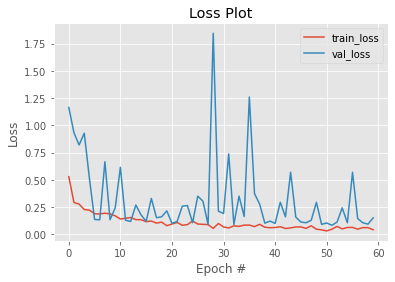

In [63]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 60), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 60), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

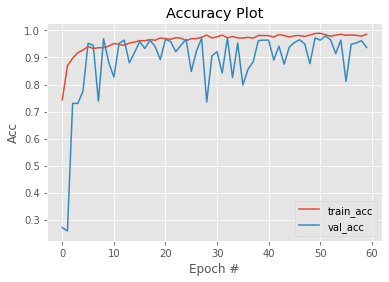

In [64]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 60), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 60), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

Accuracy  : 0.9718430034129693
Precision : 0.971814652931654
f1Score : 0.971624266050988
[[293  24]
 [  9 846]]


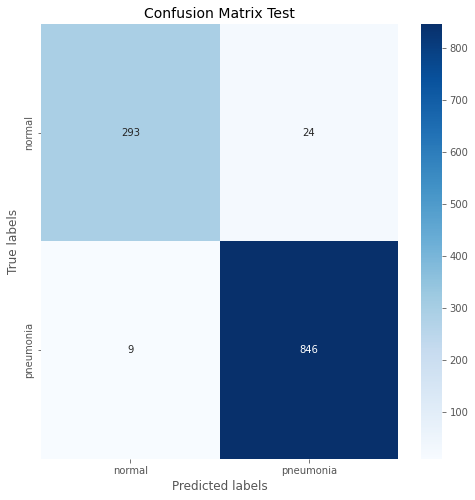

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, f1_score
import seaborn as sns
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score


predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(8,8))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Blues)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

In [66]:
from sklearn.metrics import classification_report

print(classification_report(true_classes, yPredictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       317
           1       0.97      0.99      0.98       855

    accuracy                           0.97      1172
   macro avg       0.97      0.96      0.96      1172
weighted avg       0.97      0.97      0.97      1172



In [67]:
#Balanced Accuracy
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(true_classes, yPredictions))

0.9568819525153578


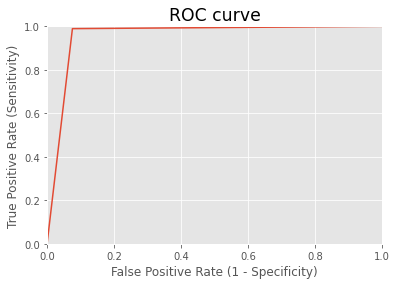

In [68]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(true_classes, yPredictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [69]:
model.save('C:\\Users\Aris\OneDrive\Documents\TKC_CIBR\TKC-TUGAS3dan4-CIBR\static\model\97ResNet50.h5')

In [6]:
class FeatureExtractor:
    def __init__(self, model):
        self.model = model
    
    def extract(self, img):
        img = img.resize((224, 224))
        img = img.convert('RGB')
        	
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        feature = self.model.predict(x)[0]
        
        return feature / np.linalg.norm(feature)

fe = FeatureExtractor(load_model('C:\\Users\Aris\OneDrive\Documents\TKC_CIBR\TKC-TUGAS3dan4-CIBR\static\model\97ResNet50.h5', compile=False))

In [12]:
feature_dir = 'C:/Users/Aris/OneDrive/Documents/TKC_CIBR/TKC-TUGAS3dan4-CIBR/static/feature'
base_dir = 'C:/Users/Aris/chest_images/combined_data'

img_paths = list()
features = list()

for img_path in sorted(Path(base_dir).glob("*.jpeg")):
    img_paths.append(img_path)
    feature = fe.extract(img=Image.open(img_path))
    print(feature)
    features.append(feature)

features = np.array(features)
np.save(feature_dir + '/extracted_feature_new.npy', features)

1/1 [==============================] - 0s 22ms/step
[1.]
1/1 [==============================] - 0s 22ms/step
[1.]
1/1 [==============================] - 0s 23ms/step
[1.]
1/1 [==============================] - 0s 22ms/step
[1.]
1/1 [==============================] - 0s 21ms/step
[1.]
1/1 [==============================] - 0s 24ms/step
[1.]
1/1 [==============================] - 0s 21ms/step
[1.]
1/1 [==============================] - 0s 22ms/step
[1.]
1/1 [==============================] - 0s 23ms/step
[1.]
1/1 [==============================] - 0s 23ms/step
[1.]
1/1 [==============================] - 0s 29ms/step
[1.]
1/1 [==============================] - 0s 24ms/step
[1.]
1/1 [==============================] - 0s 23ms/step
[1.]
1/1 [==============================] - 0s 23ms/step
[1.]
1/1 [==============================] - 0s 22ms/step
[1.]
1/1 [==============================] - 0s 21ms/step
[1.]
1/1 [==============================] - 0s 22ms/step
[1.]
1/1 [==========================

1/1 [==============================] - 0s 26ms/step


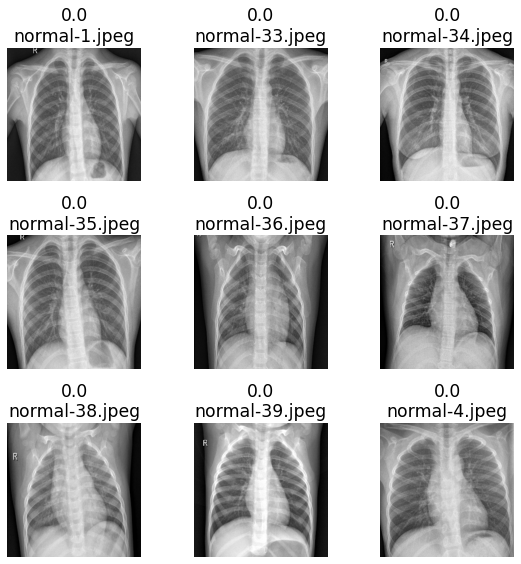

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import os

query_image = img_paths[150]
img = Image.open(query_image)

query = fe.extract(img)

dists = np.linalg.norm(features - query, axis=1)

# Extract 9 images that have lowest distance
ids = np.argsort(dists)[:9]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes = list()
fig = plt.figure(figsize=(8,8))

for a in range(3 * 3):
    axes.append(fig.add_subplot(3, 3, a+1))

    score = scores[a]

    nama_citra = os.path.basename(score[1])

    subplot_title = str(score[0]) + f"\n{nama_citra}"
    axes[-1].set_title(subplot_title)  

    plt.axis('off')
    plt.imshow(Image.open(score[1]))

fig.tight_layout()
plt.show()